In [2]:
# Import libraries
import requests
import matplotlib.pyplot as plt 

In [8]:
# Read the API key
# financialmodelingprep

api_key = open("API_Key.txt", "r").read()

In [10]:
# Select the company and the time horizon
company = "FB"
years = 2

In [12]:
# Obtain the balance sheet information
balance_sheet = requests.get (f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?limit={years}&apikey={api_key}")
balance_sheet = balance_sheet.json()

In [13]:
# Dictionary keys
print (balance_sheet[0].keys())

dict_keys(['date', 'symbol', 'reportedCurrency', 'fillingDate', 'acceptedDate', 'period', 'cashAndCashEquivalents', 'shortTermInvestments', 'cashAndShortTermInvestments', 'netReceivables', 'inventory', 'otherCurrentAssets', 'totalCurrentAssets', 'propertyPlantEquipmentNet', 'goodwill', 'intangibleAssets', 'goodwillAndIntangibleAssets', 'longTermInvestments', 'taxAssets', 'otherNonCurrentAssets', 'totalNonCurrentAssets', 'otherAssets', 'totalAssets', 'accountPayables', 'shortTermDebt', 'taxPayables', 'deferredRevenue', 'otherCurrentLiabilities', 'totalCurrentLiabilities', 'longTermDebt', 'deferredRevenueNonCurrent', 'deferredTaxLiabilitiesNonCurrent', 'otherNonCurrentLiabilities', 'totalNonCurrentLiabilities', 'otherLiabilities', 'totalLiabilities', 'commonStock', 'retainedEarnings', 'accumulatedOtherComprehensiveIncomeLoss', 'othertotalStockholdersEquity', 'totalStockholdersEquity', 'totalLiabilitiesAndStockholdersEquity', 'totalInvestments', 'totalDebt', 'netDebt', 'link', 'finalLink'

In [16]:
# Print Current Assets value 
total_current_assets = balance_sheet [0] ["totalCurrentAssets"] # Denote the most recent value
print (f"Total Current Assets of {company}: {total_current_assets:,}")

# Print Current Liabilities value 
total_current_liabilities = balance_sheet [0] ["totalCurrentLiabilities"] 
print (f"Total Current Liabilities of {company}: {total_current_liabilities:,}")

Total Current Assets of FB: 75,670,000,000
Total Current Liabilities of FB: 14,981,000,000


In [17]:
# Net Cash 
total_debt = balance_sheet [0] ["totalDebt"]
total_cash = balance_sheet [0] ["cashAndCashEquivalents"]
net_cash = total_cash - total_debt 
print (f"Net Cash: {net_cash:,}") 

Net Cash: 6,922,000,000


In [18]:
# Intangibles %
total_intangibles = balance_sheet [0] ["intangibleAssets"]
total_assets = balance_sheet [0] ["totalAssets"]
intangible_pct = total_intangibles / total_assets

print (f"Intangible Assets Percentage: {intangible_pct * 100:.2f}")

Intangible Assets Percentage: 0.39


# Quarterly Value

In [19]:
# Obtain the balance sheet information
balance_sheet = requests.get (f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?period=quarterly&?limit={years}&apikey={api_key}")
balance_sheet = balance_sheet.json()

In [24]:
# Obtain quarerly total assets 
assets_q1 = balance_sheet[4]["totalAssets"]
assets_q2 = balance_sheet[3]["totalAssets"]
assets_q3 = balance_sheet[2]["totalAssets"]
assets_q4 = balance_sheet[1]["totalAssets"]

assets_data = [assets_q1, assets_q2, assets_q3, assets_q4]
assets_data = [x / 1000000000 for x in assets_data]

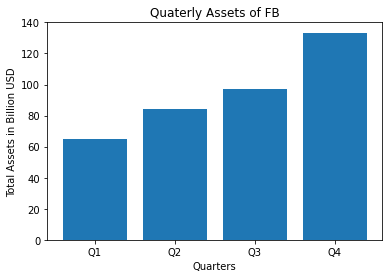

In [25]:
# Plot it 
plt.bar ([1,2,3,4], assets_data)
plt.title (f"Quaterly Assets of {company}")
plt.xlabel ("Quarters")
plt.ylabel ("Total Assets in Billion USD")
plt.xticks ([1,2,3,4], ["Q1","Q2","Q3","Q4"])
plt.show()